In [1]:
import networkx as nx

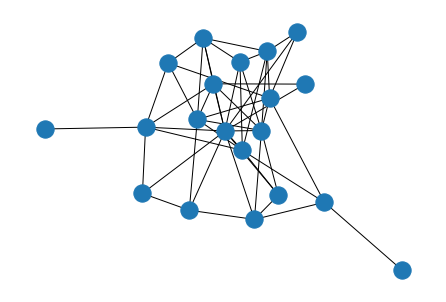

In [2]:
G = nx.gnm_random_graph(20, 50)
nx.draw(G)

In [3]:
def ini_state(G):
    s = {}
    for n in G.nodes:
        s[n] = 'asleep'
    return s

In [4]:
ini_state(G)

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

In [5]:
import random

P = 0.2
def state_transition(G, current_state):
    nexts = {}
    for node in G.nodes:
        if current_state[node] == 'asleep':
            if random.random() < P:
                nexts[node] = 'awake'
    return nexts

In [6]:
test = ini_state(G)
state_transition(G, test)

{0: 'awake', 12: 'awake', 15: 'awake'}

In [7]:
from simulation import Simulation

s = Simulation(G, ini_state, state_transition, name='Simple Sim')

In [8]:
s.state()

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

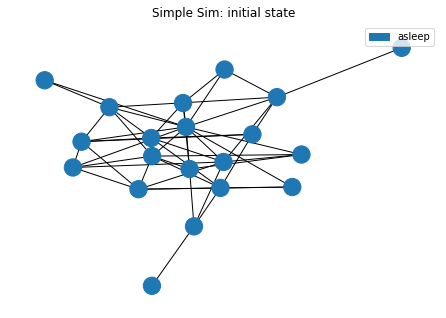

In [9]:
s.draw()

In [10]:
s.run()

In [11]:
s.steps

1

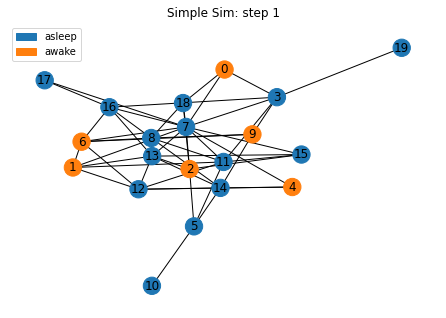

In [12]:
s.draw(with_labels=True)

In [13]:
s.state()

{0: 'awake',
 1: 'awake',
 2: 'awake',
 3: 'asleep',
 4: 'awake',
 5: 'asleep',
 6: 'awake',
 7: 'asleep',
 8: 'asleep',
 9: 'awake',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

In [14]:
s.run(5)

In [15]:
s.steps

6

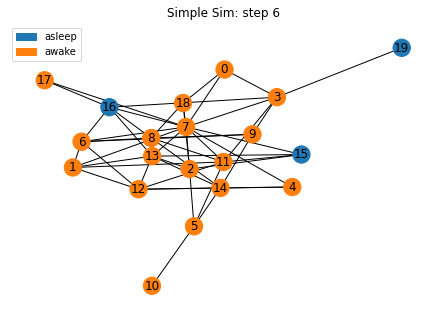

In [16]:
s.draw(with_labels=True)

<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

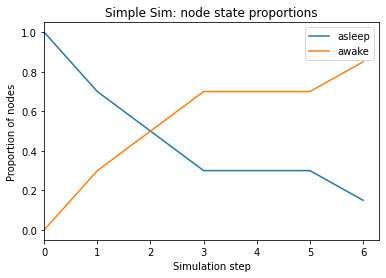

In [17]:
s.plot()

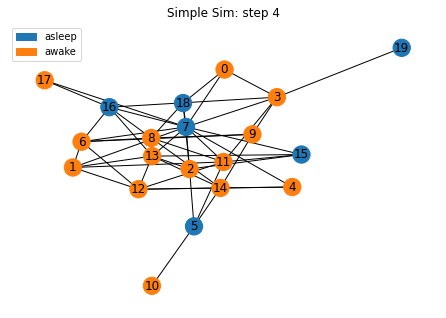

In [18]:
s.draw(4, with_labels=True)

In [20]:
s.state(4)

{0: 'awake',
 1: 'awake',
 2: 'awake',
 3: 'awake',
 4: 'awake',
 5: 'asleep',
 6: 'awake',
 7: 'asleep',
 8: 'awake',
 9: 'awake',
 10: 'awake',
 11: 'awake',
 12: 'awake',
 13: 'awake',
 14: 'awake',
 15: 'asleep',
 16: 'asleep',
 17: 'awake',
 18: 'asleep',
 19: 'asleep'}

<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

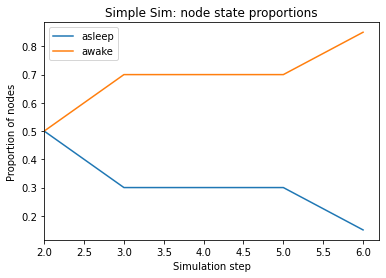

In [26]:
s.plot(min_step=2, max_step=7)

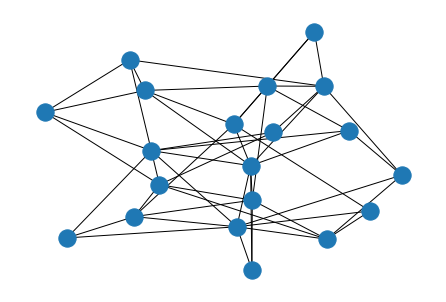

In [27]:
import networkx as nx

G = nx.gnm_random_graph(20, 50)
nx.draw(G)

In [28]:
import random
import string

def inistate(G):
    state = {}
    for node in G.nodes:
        state[node] = random.choice('ABCD')
    return state

In [29]:
inistate(G)

{0: 'C',
 1: 'B',
 2: 'C',
 3: 'A',
 4: 'A',
 5: 'C',
 6: 'B',
 7: 'A',
 8: 'A',
 9: 'B',
 10: 'A',
 11: 'B',
 12: 'A',
 13: 'B',
 14: 'A',
 15: 'D',
 16: 'A',
 17: 'D',
 18: 'A',
 19: 'D'}

In [33]:
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        # Caveat: what if the node has no neighbors?
        if G.degree(node) > 0:
            nei = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[nei]
    return next_state

In [34]:
test_state = inistate(G)
state_transition(G, test_state)

{0: 'A',
 1: 'C',
 2: 'A',
 3: 'C',
 4: 'C',
 5: 'A',
 6: 'A',
 7: 'B',
 8: 'B',
 9: 'B',
 10: 'A',
 11: 'D',
 12: 'B',
 13: 'D',
 14: 'D',
 15: 'C',
 16: 'A',
 17: 'D',
 18: 'B',
 19: 'B'}

In [41]:
import matplotlib.pyplot as plt

s = Simulation(G, inistate, state_transition, name=' model')

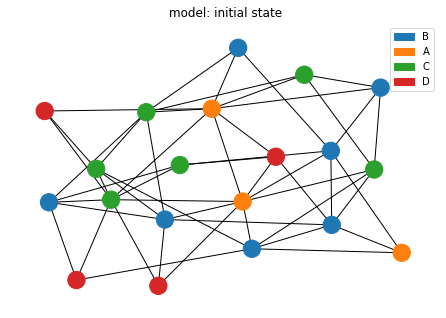

In [42]:
s.draw()

In [46]:
s.run(30)

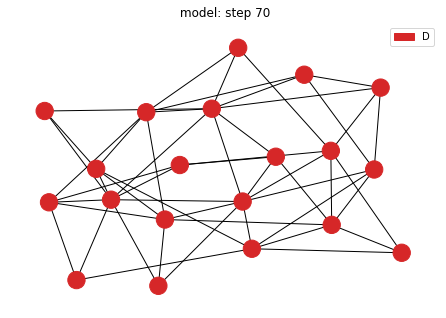

In [47]:
s.draw()

<AxesSubplot:title={'center':'Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

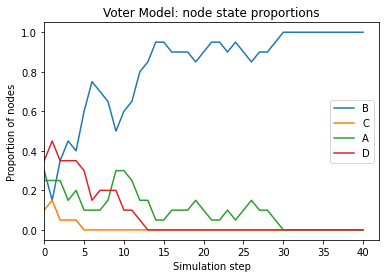

In [48]:
sim.plot()

In [49]:
import random

def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state

In [50]:
def state_transition_async(G, current_state):
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
    return current_state

In [51]:
def state_transition_async(G, current_state):
    # Randomizing the update order prevents bias
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
    return current_state

<AxesSubplot:title={'center':'Async Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

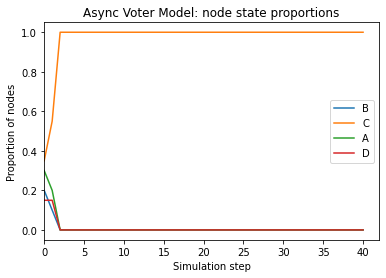

In [54]:
s = Simulation(G, inistate, state_transition_async, name='Async Voter Model')
s.run(40)
s.plot()

In [55]:
def stop(G, current_state):
    unique_state_values = set(current_state.values())
    is_stopped = len(unique_state_values) <= 1
    return is_stopped

In [56]:
s = Simulation(G, inistate, state_transition, stop, name='Voter model')
s.run(100)

Stop condition met at step 14.


In [57]:
s.steps

14

<AxesSubplot:title={'center':'Voter model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

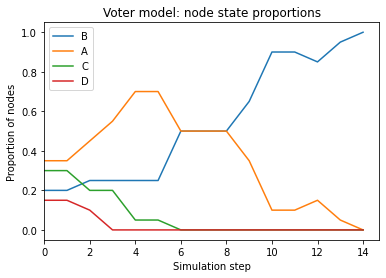

In [58]:
s.plot()

In [59]:
def state_transition_async_rewiring(G, current_state):
    # Randomizing the update order prevents bias
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node) > 0:
            # This is the same as before
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
            # This is the new part
            neighbor = random.choice(list(G.neighbors(node)))
            if current_state[node] != current_state[neighbor]:
                G.remove_edge(node, neighbor)
            
    return current_state

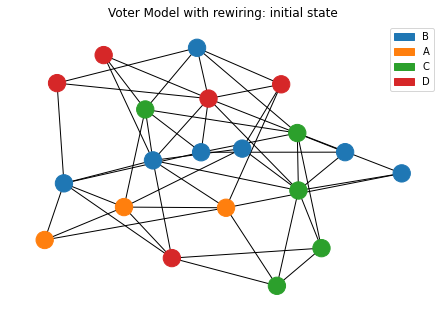

In [61]:
s = Simulation(G, inistate, state_transition_async_rewiring, stop,name='Voter Model with rewiring')
s.draw()

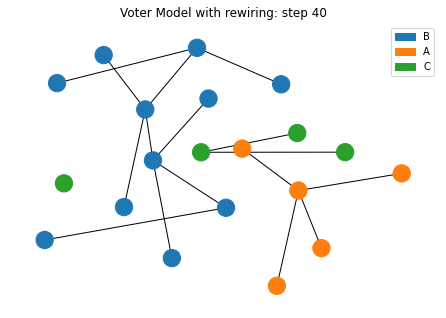

In [62]:
s.run(40)
s.draw()

<AxesSubplot:title={'center':'Voter Model with rewiring: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

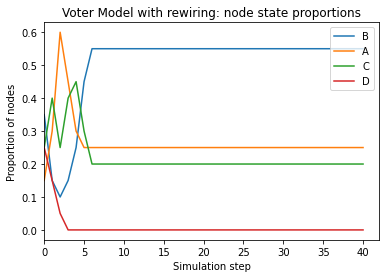

In [63]:
s.plot()

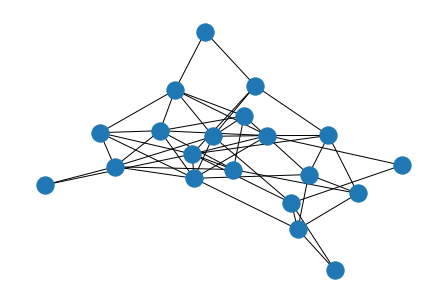

In [64]:
import networkx as nx

G = nx.gnm_random_graph(20, 50)
nx.draw(G)

In [65]:
import random

def initial(G):
    state = {}
    for node in G.nodes:
        state[node] = 'S'
    
    patient_zero = random.choice(list(G.nodes))
    state[patient_zero] = 'I'
    return state

In [66]:
initial(G)

{0: 'S',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'I',
 8: 'S',
 9: 'S',
 10: 'S',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'S',
 15: 'S',
 16: 'S',
 17: 'S',
 18: 'S',
 19: 'S'}

In [67]:
MU = 0.2
BETA = 0.2

def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'I':
            if random.random() < MU:
                next_state[node] = 'S'
        else: # current_state[node] == 'S'
            for neighbor in G.neighbors(node):
                if current_state[neighbor] == 'I':
                    if random.random() < BETA:
                        next_state[node] = 'I'

    return next_state

In [68]:
test_state = initial(G)
state_transition(G, test_state)

{}

In [69]:
sim = Simulation(G, initial, state_transition, name='SIS model')

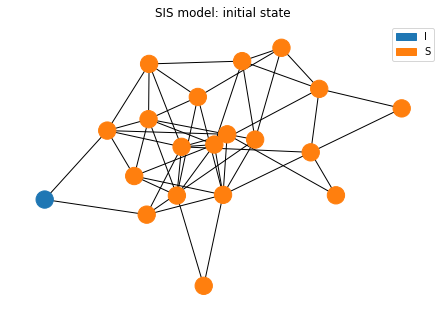

In [70]:

sim.draw()

In [71]:
sim.run(25)

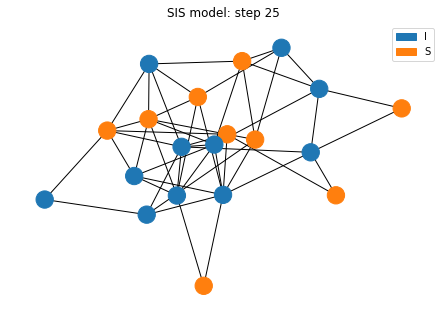

In [72]:

sim.draw()

<AxesSubplot:title={'center':'SIS model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

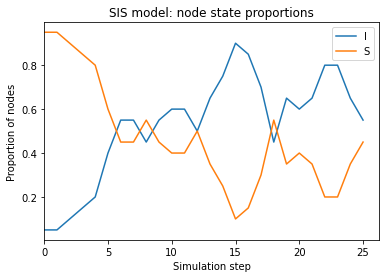

In [73]:
sim.plot()